# Esse é o código para resolução do desafio Seazone

Ele consiste na análise de dados imobiliários.

O Jupyter Notebook foi a ferramenta escolhida pela clareza do código e facilidade na visualização dos dados.

<h3> Começamos importando os módulos necessários em Python <\h3>

In [1]:
# Descomente e execute os comandos abaixo se o codigo não funcionar

# !pip install pandas
# !pip install numpy
# !pip install datetime
# !pip install matplotlib

In [2]:
import pandas as pd # Representação dos dados
import numpy as np # Calculos numericos e estatisticos
import datetime # Facilitar os calculos envolvendo datas
import matplotlib.pyplot as plt # Metodos para visualização dos dados

O primeiro passo é abrir os arquivos .csv e representá-los na forma de um dataframe em Pandas

In [3]:
diretorio_dados1 = "./Data/desafio_details (1).csv"
diretorio_dados2 = "./Data/desafio_priceav (1).csv"

data_details = pd.read_csv(diretorio_dados1)
data_price = pd.read_csv(diretorio_dados2)

Agora a visualização inicial dos dataframes

In [4]:
print("Dataset detais")
data_details.head()

Dataset detais


,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [5]:
print("Dataset Price")
data_price.head()

Dataset Price


,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


Análise no número de features e tamanho.

In [6]:
print(data_details.shape)
print(data_price.shape)

(4691, 9)
(354520, 7)


O csv parece ter sido extraído de um database relacional SQL, ou se beneficiaria muito de ser organizado nesse tipo de database.

Contudo, como a transformação em SQL pode ser custosa em tempo de computação, os dados serão analisados em pandas. O Pandas possui também operações de vetorização que garantem uma boa eficiência.

Seria recomendado adicionar os dados a esse tipo de database se diversas consultas relacionais forem necessárias, já que as consultas poderiam ser otimizadas com indexações e hashes.

# 1 Tarefa

Ordenar os bairros.

Começamos construindo o dicionário para armazenar os listings por bairro.

E verificando os nomes dos bairros diferentes estudados.

In [7]:
# Nesse codigo vamos realizar algo similar a operação do database relacional
# Com diacionarios com hash optimal para aumentar a velocidade do codigo

# Extraindo os nomes do bairro do dataframe
bairros_nome = data_details.loc[:, "suburb"].unique()
print(bairros_nome)

# Criação do dicionario para contar os listings
listings_bairro = {}
for bairro in bairros_nome:
    listings_bairro[bairro] = 0

['Jurerê' 'Canasvieiras' 'Ingleses' 'Lagoa da Conceição' 'Centro']


Agora é necessário criar um hash entre os listings e os bairros para fácil acesso.

In [8]:
# Criação de um hash entre listings e bairros para rapido acesso
hash_listing_bairro = {}

for listing, bairro in zip(data_details.loc[:, "airbnb_listing_id"], data_details.loc[:, "suburb"]):
    hash_listing_bairro[listing] = bairro

Agora devemos ler o número de listings e utilizar o hash

Para isso contamos o número de listintins por id usando a função value counts e depois usamos o hash para converter no número de listings por bairro.

Como nem todos os listings dos faturamentos individuais estão na outra tabela, usamos o exception para desconsiderar elas do cálculo.

In [9]:
counts_per_listing = dict(data_price["airbnb_listing_id"].value_counts())

# Nem todos os listings estao na tabela original
print("34150577" in str(data_details.loc[:, "airbnb_listing_id"].unique()))

for listing in counts_per_listing.keys():
    try:
        bairro = hash_listing_bairro[listing]
        listings_bairro[bairro] = listings_bairro[bairro] + counts_per_listing[listing]
    except KeyError:
        continue
    

False


Agora, ordenarmos o dicionário usando os valores obtidos.

In [10]:
listings_bairro_sorted = dict(sorted(listings_bairro.items(), key=lambda item: item[1], reverse=True))
for key in listings_bairro_sorted:
    print(key, listings_bairro_sorted[key])

Ingleses 176864
Canasvieiras 92186
Jurerê 42857
Lagoa da Conceição 23431
Centro 19182


O gráfico de barras para melhor visualização

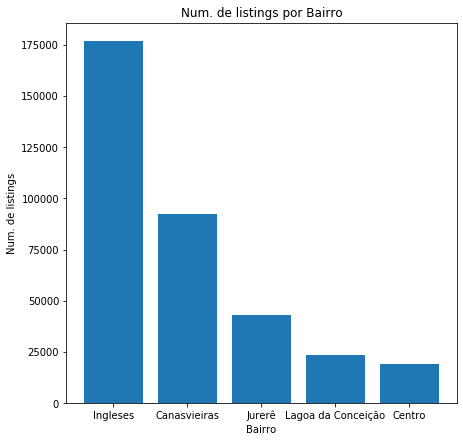

In [11]:
x = list(range(len(listings_bairro_sorted)))
plt.figure(figsize=(7,7))
plt.title("Num. de listings por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Num. de listings")
plt.xticks(x, list(listings_bairro_sorted.keys()))
plt.bar(x, list(listings_bairro_sorted.values()))
plt.show()

# Tarefa 2

Para realização da tarefa 2 começaremos calculando o faturamento por listing e adicionando ao dataframe data_details

Isso foi feito para facilitar a resolução da questão 3 que envolve também dados de faturamento.

In [12]:
# Separar as variaveis de listing_ids para vetorização
listings_ids = list(data_details.loc[:, "airbnb_listing_id"])

faturamento = []
for list_id in listings_ids:
    faturamento.append(sum(data_price[data_price["airbnb_listing_id"] == list_id]["price_string"]))
    
# Adicionando o faturamento ao dataframe
data_details["Faturamento"] = faturamento

Visualização da nova tabela

In [13]:
data_details.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Faturamento
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0,13510.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0,35740.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0,16806.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0,0.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0,26825.0


Agora é apenas uma questão de vetorização para encontrar o faturamento por bairro

In [14]:
# Calculo do faturamento por bairro
faturamento_por_bairro = {}
for bairro in bairros_nome:
    faturamento_por_bairro[bairro] = sum(data_details[data_details["suburb"] == bairro]["Faturamento"])
    
# Colocar na ordem correta
faturamento_por_bairro_sorted = dict(sorted(faturamento_por_bairro.items(), key=lambda item: item[1], reverse=True))
for key in faturamento_por_bairro_sorted:
    print(key, faturamento_por_bairro_sorted[key])

Ingleses 61968020.0
Canasvieiras 26970963.0
Jurerê 17403150.0
Lagoa da Conceição 5869797.0
Centro 4202565.0


Novamente o gráfico de barras para melhor visualização

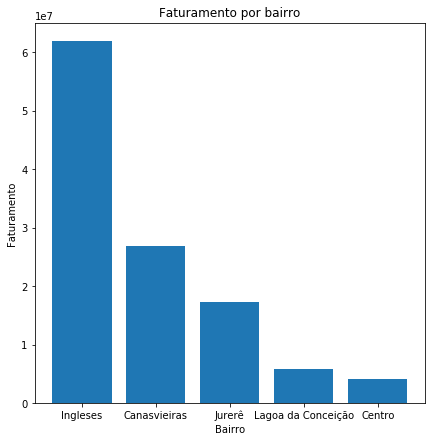

In [15]:
x = list(range(len(faturamento_por_bairro)))
plt.figure(figsize=(7,7))
plt.title("Faturamento por bairro")
plt.xlabel("Bairro")
plt.ylabel("Faturamento")
plt.xticks(x, list(faturamento_por_bairro_sorted.keys()))
plt.bar(x, list(faturamento_por_bairro_sorted.values()))
plt.show()

<h4> 2 Tarefa Extra </h4>

Outro valor interessante ser calculado é o faturamento por listing. Como os bairros podem ser de tamanhos diferentes e possuir um número diferente de listagens.

Jurerê 406.07485358284526
Ingleses 350.3710195404378
Canasvieiras 292.57113878463105
Lagoa da Conceição 250.51414792369084
Centro 219.08898967782295


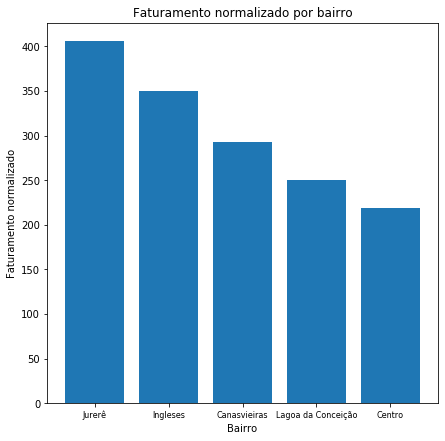

In [16]:
# Normalizando os faturamentos de cada bairro por listing
faturamento_por_bairro_normalizado = {}

for bairro in bairros_nome:
       faturamento_por_bairro_normalizado[bairro] = faturamento_por_bairro_sorted[bairro]/listings_bairro_sorted[bairro]
        
# Ordenando o dicionario
faturamento_por_bairro_normalizado = dict(sorted(faturamento_por_bairro_normalizado.items(), key=lambda item: item[1], reverse=True))

for key in faturamento_por_bairro_normalizado:
    print(key, faturamento_por_bairro_normalizado[key])
        
x = list(range(len(faturamento_por_bairro)))
plt.figure(figsize=(7,7))
plt.title("Faturamento normalizado por bairro")
plt.xlabel("Bairro")
plt.ylabel("Faturamento normalizado")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.xticks(x, list(faturamento_por_bairro_normalizado.keys()))
plt.bar(x, list(faturamento_por_bairro_normalizado.values()))
plt.show()

O faturamento normalizado modifica completamente a ordem, esse resultado pode mudar as decisões estratégicas.

# 3 Tarefa

Como o dataframe foi otimizado na segunda tarefa a terceira é obtida diretamente da chamada de correlação do Pandas.

Primeiramente a correlação pode ser calculada com valores numéricos então realizamos uma substituição. Como estamos interessados na relação entre o nome do bairro e o faturamento substituímos os bairros com maior faturamento pelos maiores valores.

Aqui precisamos fazer certas operações de limpeza nos dados, removendo a coluna "Unamed: 0". 

Removemos o ad_name pois não sera utilizado no cálculo da correlação.

In [17]:
# Aqui removemos as colunas não utilizadas para correlação
# O try except esta aqui para não termos problemas reutilização do codigo
data_details_features = []
for feature in data_details:
    data_details_features.append(feature)

try:
    index_unnamed = data_details_features.index("Unnamed: 0")
    data_details_features.pop(index_unnamed)
    data_details.drop(data_details.columns[index_unnamed], axis=1, inplace=True)
    index_ad_name = data_details_features.index("ad_name")
    data_details.drop(data_details.columns[index_ad_name], axis=1, inplace=True)
except KeyError:
    pass
except ValueError:
    pass
print(data_details_features)

# Trocamos para valores numericos para o calculo da correlação
dicionario_processamento_bairros_para_numero = {}
for i,bairro in enumerate(reversed(list(faturamento_por_bairro_sorted.keys()))):
    dicionario_processamento_bairros_para_numero[bairro] = i

dicionario_processamento_superhost_para_numero = {False:0, True:1}
try:
    data_details["is_superhost"].replace(dicionario_processamento_superhost_para_numero, inplace=True)
    data_details["suburb"].replace(dicionario_processamento_bairros_para_numero, inplace=True)
except TypeError:
    pass

['airbnb_listing_id', 'suburb', 'ad_name', 'number_of_bedrooms', 'number_of_bathrooms', 'star_rating', 'is_superhost', 'number_of_reviews', 'Faturamento']


A cada operação de mudança é importante visualizar o dataframe

In [18]:
data_details.head()

,airbnb_listing_id,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Faturamento
0,31389869,2,2.0,2.0,5.0,0,15.0,13510.0
1,40010667,3,1.0,1.0,NaN,0,0.0,35740.0
2,38905997,4,1.0,1.0,4.5,1,13.0,16806.0
3,22343656,4,2.0,1.0,5.0,1,28.0,0.0
4,18328184,3,2.0,1.0,5.0,1,35.0,26825.0


In [19]:
# Usamos min_periods = 2 para evitar que valores singulares sejam usados no calculo de correlação
correlation = data_details.corr(method='pearson', min_periods=1)
print(correlation)

                     airbnb_listing_id    suburb  number_of_bedrooms  \
airbnb_listing_id             1.000000  0.017796           -0.051791   
suburb                        0.017796  1.000000            0.184511   
number_of_bedrooms           -0.051791  0.184511            1.000000   
number_of_bathrooms          -0.047441  0.181385            0.745900   
star_rating                  -0.013159 -0.031674           -0.013281   
is_superhost                 -0.082513 -0.145459           -0.102447   
number_of_reviews            -0.347276 -0.247246           -0.097374   
Faturamento                   0.036830  0.061871            0.124927   

                     number_of_bathrooms  star_rating  is_superhost  \
airbnb_listing_id              -0.047441    -0.013159     -0.082513   
suburb                          0.181385    -0.031674     -0.145459   
number_of_bedrooms              0.745900    -0.013281     -0.102447   
number_of_bathrooms             1.000000     0.005792     -0.095708

Agora extraímos a parte da correlação com o fraturamento

In [20]:
faturamento_corelaçao = correlation["Faturamento"][:-1]

Finalmente os valores de correlação normalizados e o bar graph

airbnb_listing_id      0.036830
suburb                 0.061871
number_of_bedrooms     0.124927
number_of_bathrooms    0.145818
star_rating            0.049635
is_superhost           0.032814
number_of_reviews      0.044416
Name: Faturamento, dtype: float64


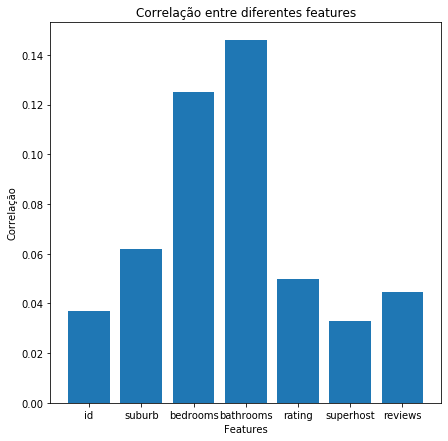

In [21]:
print(faturamento_corelaçao)

for i,feature in enumerate(data_details):
    data_details_features[i] = feature.split("_")[-1]    

x = list(range(len(faturamento_corelaçao)))
plt.figure(figsize=(7,7))
plt.title("Correlação entre diferentes features")
plt.xlabel("Features")
plt.ylabel("Correlação")
plt.xticks(x, list(data_details_features))
plt.tick_params(axis='x', which='major', labelsize=10)
plt.bar(x, list(faturamento_corelaçao))
plt.show()

# 4 Tarefa

Aqui vamos analisar a antecedência media das reservas.

O modulo datetime é excelente para fazer isso, pois permite a subtração direta entre datas. Ele ainda permite o cálculo do dia da semana com o fornecimento da data, ou seja, ideal para analisar as frequências de ocupação.

In [22]:
# Primeiro processamos os dados retirando 
data_price_processed = data_price[data_price["booked_on"] != "blank"]

data_price_processed.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1


In [23]:
# Infelizmente nesse momento é necessario fazer um loop por todos os dados restantes no dataset
# Começamos definindo as variaveis necessarias para o calculo da media
# E depois o dicionario para a construção do histograma referente as ocupações por dia da semana
total_days_distance = 0
days_counter = 0
frequencia_dia_ocupacao = {"Segunda": 0, "Terça": 0, "Quarta": 0, "Quinta":0, "Sexta":0, "Sabado":0, "Domingo":0}
frequencia_dia_reservacao = {"Segunda": 0, "Terça": 0, "Quarta": 0, "Quinta":0, "Sexta":0, "Sabado":0, "Domingo":0}
hash_weekday_nome = {0: "Segunda", 1:"Terça", 2:"Quarta", 3:"Quinta", 4:"Sexta", 5:"Sabado", 6:"Domingo"}

for booking,date in zip(data_price_processed["booked_on"], data_price_processed["date"]):
    
    # Essa parte do codigo se refere a distância dos dias da reserva a data de ocupação
    # Primeiramente processamos as datas da coluna e transformamos no objeto datetime
    booking = booking.split(" ")[0].split("-")
    booking = datetime.datetime(int(booking[0]), int(booking[1]), int(booking[2]))
    date = date.split("-")
    date = datetime.datetime(int(date[0]), int(date[1]), int(date[2]))
    
    # Distância entre os dias e adicionar ao dicinario de contagem
    days = (date - booking).days
    total_days_distance = total_days_distance + days
    days_counter = days_counter + 1
    
    # Obter o dia da reservacao e adicionar ao dicionario de contagem
    weekday = hash_weekday_nome[booking.weekday()]
    frequencia_dia_reservacao[weekday] = frequencia_dia_reservacao[weekday] + 1
    
    # Obter o dia de ocupaca e adicionar ao dicionario de contagem
    weekday = hash_weekday_nome[date.weekday()]
    frequencia_dia_ocupacao[weekday] = frequencia_dia_ocupacao[weekday] + 1
    
    

Agora temos a visualização final dos dados

In [24]:
print("Media das datas das reservações antecipadas: " + str(int(total_days_distance/days_counter)))

Media das datas das reservações antecipadas: 32


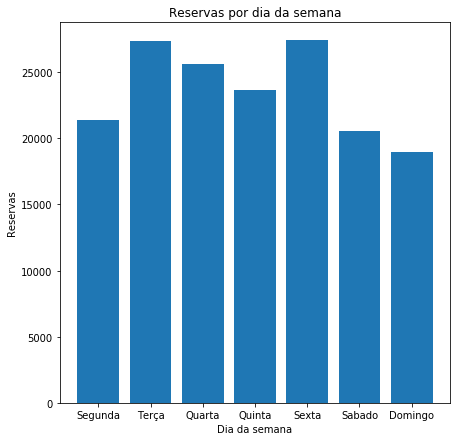

In [25]:
x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Reservas por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas")
plt.xticks(x, list(frequencia_dia_reservacao.keys()))
plt.bar(x, list(frequencia_dia_reservacao.values()))
plt.show()

Nesse ultimo histograma podemos perceber que as datas de ocupação são relativamente uniformes, mas a data que os clientes mais usam para fazer a reservação é a sexta e a terça.

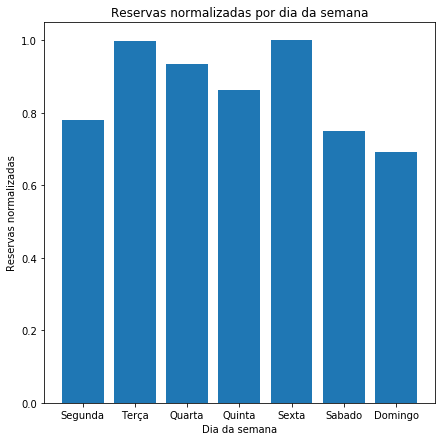

In [26]:
x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Reservas normalizadas por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas normalizadas")
plt.xticks(x, list(frequencia_dia_reservacao.keys()))
plt.bar(x, [i/max(frequencia_dia_reservacao.values()) for i in frequencia_dia_reservacao.values()])
plt.show()

O gráfico normalizado não é muito diferente do absoluto, as conclusões permanecem iguais.

Uma última análise para os dias de ocupação. Repetindo os mesmos procedimentos de visualização:

Segunda 23289
Terça 23561
Quarta 22154
Quinta 22282
Sexta 24053
Sabado 25543
Domingo 24069


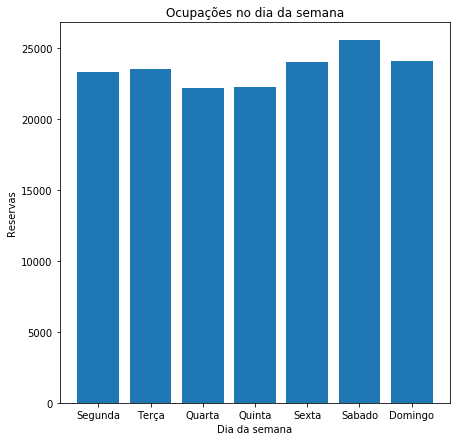

In [27]:
for day in frequencia_dia_ocupacao:
    print(day, frequencia_dia_ocupacao[day])

x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Ocupações no dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas")
plt.xticks(x, list(frequencia_dia_ocupacao.keys()))
plt.bar(x, list(frequencia_dia_ocupacao.values()))
plt.show()

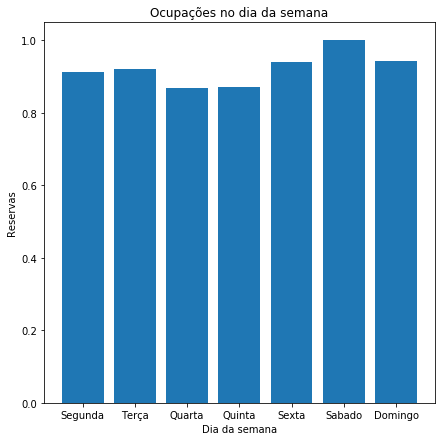

In [28]:
x = list(range(7))
plt.figure(figsize=(7,7))
plt.title("Ocupações no dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Reservas")
plt.xticks(x, list(frequencia_dia_ocupacao.keys()))
plt.bar(x, [i/max(frequencia_dia_ocupacao.values()) for i in frequencia_dia_ocupacao.values()])
plt.show()

Percebemos que os dias de ocupação são mais uniformes, sem muita preferência. Contudo, o sábado e domingo são vencedores por uma pequena margem.